In [1]:
"""Name: Vamshikrishna Domala
   Station: Peurto Rico Coast
   Station Number: 41044
   Model:FBProphet Multivariate
   Data Lenth: 5Years
   Date:22/11/2021
"""

'Name: Vamshikrishna Domala\n   Station: Peurto Rico Coast\n   Station Number: 41044\n   Model:FBProphet Multivariate\n   Data Lenth: 5Years\n   Date:22/11/2021\n'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet #Facebook prophet model for time series prediction

C:\Users\Domala\.conda\envs\Deep_learning\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Domala\.conda\envs\Deep_learning\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Users\Domala\.conda\envs\Deep_learning\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)


In [3]:
data=pd.read_excel(r"41044h2020_filtered_Final_file_1year_y_removed.xlsx")

In [4]:
data

,Date,WDIR_deg,WSPD_m/s,GST_m/s,WVHT_m,DPD_sec,APD_sec,MWD_deg,PRES_hpa,ATMP_deg,DEWP_deg
0,2015-01-01 00:50:00,120,5.0,5.9,1.49,7.69,6.39,94,1022.2,26.0,21.7
1,2015-01-01 01:50:00,119,4.6,5.5,1.29,8.33,5.98,102,1022.4,25.9,21.7
2,2015-01-01 02:50:00,120,4.5,5.2,1.37,7.69,6.00,98,1022.4,25.9,21.8
3,2015-01-01 03:50:00,113,4.8,5.7,1.32,7.69,6.08,101,1022.0,25.8,22.0
4,2015-01-01 04:50:00,117,4.7,5.7,1.41,7.69,5.93,107,1021.7,25.8,21.8
...,...,...,...,...,...,...,...,...,...,...,...
51829,2020-12-31 19:40:00,35,10.6,13.1,NaN,6.67,6.00,36,1019.1,24.4,20.5
51830,2020-12-31 20:40:00,38,11.0,14.2,NaN,7.14,6.10,48,1019.4,24.4,20.2
51831,2020-12-31 21:40:00,39,11.6,15.4,NaN,7.14,6.31,34,1020.1,24.4,19.9
51832,2020-12-31 22:40:00,37,10.7,13.3,NaN,7.69,6.51,38,1020.7,24.4,19.6


In [5]:
data['Date']=pd.to_datetime(data['Date'])

In [6]:
data.describe()

,WDIR_deg,WSPD_m/s,GST_m/s,WVHT_m,DPD_sec,APD_sec,MWD_deg,PRES_hpa,ATMP_deg,DEWP_deg
count,51834.000000,51834.000000,51834.000000,43050.000000,51834.000000,51834.000000,51834.000000,51834.000000,51834.000000,51834.000000
mean,102.518019,6.058492,7.689503,1.811622,9.399817,6.358091,107.292974,1018.219611,26.339412,21.684308
std,54.051574,2.232793,2.613171,0.593668,2.129336,1.029372,90.543162,2.842832,1.538535,2.257689
min,1.000000,0.000000,0.000000,0.320000,4.170000,4.350000,0.000000,1001.900000,18.900000,11.700000
25%,74.000000,4.600000,6.000000,1.400000,7.690000,5.620000,53.000000,1016.500000,25.100000,20.100000
50%,90.000000,6.200000,7.700000,1.690000,9.090000,6.140000,93.000000,1018.500000,26.300000,21.900000
75%,112.000000,7.500000,9.400000,2.100000,10.810000,6.830000,113.000000,1020.300000,27.700000,23.500000
max,360.000000,99.000000,99.000000,6.670000,21.050000,12.950000,360.000000,1027.400000,30.000000,27.500000


In [7]:
data=data[["Date","WDIR_deg","WSPD_m/s","GST_m/s","WVHT_m","DPD_sec","APD_sec","MWD_deg"]] #select date and close price for fitting the model
data=data.rename(columns={"Date":"ds","WVHT_m":"y"}) #rename the selected columns

In [8]:
data.reset_index(drop=True)

,ds,WDIR_deg,WSPD_m/s,GST_m/s,y,DPD_sec,APD_sec,MWD_deg
0,2015-01-01 00:50:00,120,5.0,5.9,1.49,7.69,6.39,94
1,2015-01-01 01:50:00,119,4.6,5.5,1.29,8.33,5.98,102
2,2015-01-01 02:50:00,120,4.5,5.2,1.37,7.69,6.00,98
3,2015-01-01 03:50:00,113,4.8,5.7,1.32,7.69,6.08,101
4,2015-01-01 04:50:00,117,4.7,5.7,1.41,7.69,5.93,107
...,...,...,...,...,...,...,...,...
51829,2020-12-31 19:40:00,35,10.6,13.1,NaN,6.67,6.00,36
51830,2020-12-31 20:40:00,38,11.0,14.2,NaN,7.14,6.10,48
51831,2020-12-31 21:40:00,39,11.6,15.4,NaN,7.14,6.31,34
51832,2020-12-31 22:40:00,37,10.7,13.3,NaN,7.69,6.51,38


In [9]:
split_date="31/12/2019 11:40:00 PM"

In [10]:
train=data.loc[data.ds <= split_date].copy()
test=data.loc[data.ds > split_date].copy()

In [11]:
train.shape

(43050, 8)

In [12]:
train

,ds,WDIR_deg,WSPD_m/s,GST_m/s,y,DPD_sec,APD_sec,MWD_deg
0,2015-01-01 00:50:00,120,5.0,5.9,1.49,7.69,6.39,94
1,2015-01-01 01:50:00,119,4.6,5.5,1.29,8.33,5.98,102
2,2015-01-01 02:50:00,120,4.5,5.2,1.37,7.69,6.00,98
3,2015-01-01 03:50:00,113,4.8,5.7,1.32,7.69,6.08,101
4,2015-01-01 04:50:00,117,4.7,5.7,1.41,7.69,5.93,107
...,...,...,...,...,...,...,...,...
43045,2019-12-31 19:40:00,76,7.3,8.6,1.81,14.81,6.61,33
43046,2019-12-31 20:40:00,93,5.4,6.8,1.67,12.12,6.68,31
43047,2019-12-31 21:40:00,90,6.1,7.9,1.82,7.69,6.52,82
43048,2019-12-31 22:40:00,97,5.5,7.0,1.82,13.79,6.66,28


In [13]:
test

,ds,WDIR_deg,WSPD_m/s,GST_m/s,y,DPD_sec,APD_sec,MWD_deg
43050,2020-01-01 00:40:00,84,7.3,8.6,NaN,10.81,6.39,27
43051,2020-01-01 01:40:00,97,6.4,8.1,NaN,10.00,6.54,20
43052,2020-01-01 02:40:00,103,6.3,7.9,NaN,10.00,6.50,24
43053,2020-01-01 03:40:00,100,6.3,8.1,NaN,13.79,6.35,29
43054,2020-01-01 04:40:00,59,6.9,8.7,NaN,10.00,6.46,25
...,...,...,...,...,...,...,...,...
51829,2020-12-31 19:40:00,35,10.6,13.1,NaN,6.67,6.00,36
51830,2020-12-31 20:40:00,38,11.0,14.2,NaN,7.14,6.10,48
51831,2020-12-31 21:40:00,39,11.6,15.4,NaN,7.14,6.31,34
51832,2020-12-31 22:40:00,37,10.7,13.3,NaN,7.69,6.51,38


In [14]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8784 entries, 43050 to 51833
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   ds        8784 non-null   datetime64[ns]
 1   WDIR_deg  8784 non-null   int64         
 2   WSPD_m/s  8784 non-null   float64       
 3   GST_m/s   8784 non-null   float64       
 4   y         0 non-null      float64       
 5   DPD_sec   8784 non-null   float64       
 6   APD_sec   8784 non-null   float64       
 7   MWD_deg   8784 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 617.6 KB


In [15]:
#model = Prophet(seasonality_mode='multiplicative',holidays=promo)
#model.fit(data)
model = Prophet(growth='linear',seasonality_mode='additive', yearly_seasonality=10, weekly_seasonality=10, daily_seasonality='auto',interval_width=0.95)
model.add_seasonality(name='monthly', period=30.5,fourier_order=10 )
#model = Prophet(holidays=promo,yearly_seasonality=10,seasonality_mode='multiplicative')
#model.add_regressor('Wa_ht(m)',standardize=False, mode='multiplicative')
#model.add_regressor('ds') #mode=multiplicative', standardize=False,
model.add_regressor('WDIR_deg',standardize=False, mode='additive') #mode=multiplicative', standardize=False,
model.add_regressor('WSPD_m/s',standardize=False, mode='additive')
model.add_regressor('GST_m/s',standardize=False, mode='additive')
model.add_regressor('DPD_sec',standardize=False, mode='additive')
model.add_regressor('APD_sec',standardize=False, mode='additive')
model.add_regressor('MWD_deg',standardize=False, mode='additive')
model.fit(train)

In [16]:
future=model.make_future_dataframe(periods=366*24,freq='h') #prediction for number of days in future

In [17]:
#future=model.make_future_dataframe(periods=365) #prediction for number of days in future
future['WDIR_deg']=data['WDIR_deg']
future['WSPD_m/s']=data['WSPD_m/s']
future['GST_m/s']=data['GST_m/s']
future['DPD_sec']=data['DPD_sec']
future['APD_sec']=data['APD_sec']
future['MWD_deg']=data['MWD_deg']

In [18]:
data.reset_index(drop=True)

,ds,WDIR_deg,WSPD_m/s,GST_m/s,y,DPD_sec,APD_sec,MWD_deg
0,2015-01-01 00:50:00,120,5.0,5.9,1.49,7.69,6.39,94
1,2015-01-01 01:50:00,119,4.6,5.5,1.29,8.33,5.98,102
2,2015-01-01 02:50:00,120,4.5,5.2,1.37,7.69,6.00,98
3,2015-01-01 03:50:00,113,4.8,5.7,1.32,7.69,6.08,101
4,2015-01-01 04:50:00,117,4.7,5.7,1.41,7.69,5.93,107
...,...,...,...,...,...,...,...,...
51829,2020-12-31 19:40:00,35,10.6,13.1,NaN,6.67,6.00,36
51830,2020-12-31 20:40:00,38,11.0,14.2,NaN,7.14,6.10,48
51831,2020-12-31 21:40:00,39,11.6,15.4,NaN,7.14,6.31,34
51832,2020-12-31 22:40:00,37,10.7,13.3,NaN,7.69,6.51,38


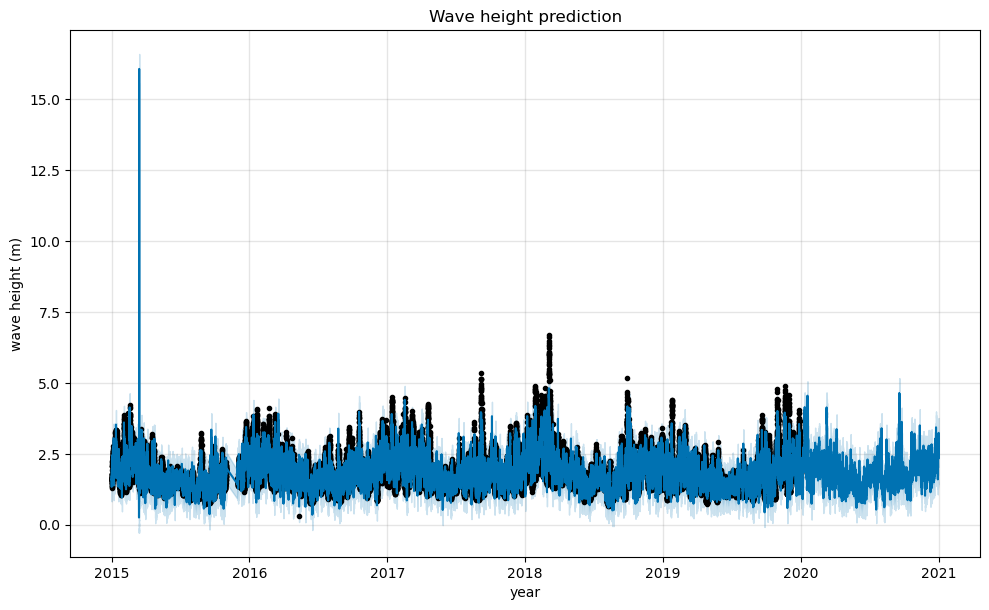

In [19]:
prediction=model.predict(future)
#plt.plot(test['ds'],test['y'], linestyle="", marker="o", color='black')
model.plot(prediction) #plotting
plt.scatter(test['ds'],test['y'],color='green')
plt.title("Wave height prediction")
plt.xlabel("year")
plt.ylabel("wave height (m)")
plt.show()

In [20]:
prediction

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,APD_sec,APD_sec_lower,APD_sec_upper,DPD_sec,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-01 00:50:00,-1.972749,1.178890,2.205152,-1.972749,-1.972749,2.837510,2.837510,2.837510,-0.193352,...,0.006515,0.006515,0.006515,0.107235,0.107235,0.107235,0.0,0.0,0.0,1.692028
1,2015-01-01 01:50:00,-1.972746,0.867273,1.973612,-1.972746,-1.972746,2.655448,2.655448,2.655448,-0.209444,...,0.002087,0.002087,0.002087,0.107126,0.107126,0.107126,0.0,0.0,0.0,1.426824
2,2015-01-01 02:50:00,-1.972743,0.892028,1.962202,-1.972743,-1.972743,2.664329,2.664329,2.664329,-0.193352,...,-0.001530,-0.001530,-0.001530,0.107016,0.107016,0.107016,0.0,0.0,0.0,1.404549
3,2015-01-01 03:50:00,-1.972740,1.001482,2.006266,-1.972740,-1.972740,2.699853,2.699853,2.699853,-0.193352,...,-0.004093,-0.004093,-0.004093,0.106904,0.106904,0.106904,0.0,0.0,0.0,1.526690
4,2015-01-01 04:50:00,-1.972736,0.915067,1.965289,-1.972736,-1.972736,2.633245,2.633245,2.633245,-0.193352,...,-0.005459,-0.005459,-0.005459,0.106790,0.106790,0.106790,0.0,0.0,0.0,1.468948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51829,2020-12-31 19:40:00,-1.910748,2.234826,3.273205,-1.968931,-1.854564,2.664329,2.664329,2.664329,-0.167706,...,0.019888,0.019888,0.019888,0.106461,0.106461,0.106461,0.0,0.0,0.0,2.773668
51830,2020-12-31 20:40:00,-1.910743,2.415330,3.503724,-1.968938,-1.854548,2.708734,2.708734,2.708734,-0.179523,...,0.017868,0.017868,0.017868,0.106343,0.106343,0.106343,0.0,0.0,0.0,2.969211
51831,2020-12-31 21:40:00,-1.910739,2.705817,3.757466,-1.968944,-1.854533,2.801986,2.801986,2.801986,-0.179523,...,0.015415,0.015415,0.015415,0.106222,0.106222,0.106222,0.0,0.0,0.0,3.234980
51832,2020-12-31 22:40:00,-1.910734,2.397282,3.487600,-1.968951,-1.854517,2.890797,2.890797,2.890797,-0.193352,...,0.012681,0.012681,0.012681,0.106101,0.106101,0.106101,0.0,0.0,0.0,2.962274


In [24]:
prediction1=prediction[:43050]

In [25]:
prediction1

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,APD_sec,APD_sec_lower,APD_sec_upper,DPD_sec,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-01 00:50:00,-1.972749,1.178890,2.205152,-1.972749,-1.972749,2.837510,2.837510,2.837510,-0.193352,...,0.006515,0.006515,0.006515,0.107235,0.107235,0.107235,0.0,0.0,0.0,1.692028
1,2015-01-01 01:50:00,-1.972746,0.867273,1.973612,-1.972746,-1.972746,2.655448,2.655448,2.655448,-0.209444,...,0.002087,0.002087,0.002087,0.107126,0.107126,0.107126,0.0,0.0,0.0,1.426824
2,2015-01-01 02:50:00,-1.972743,0.892028,1.962202,-1.972743,-1.972743,2.664329,2.664329,2.664329,-0.193352,...,-0.001530,-0.001530,-0.001530,0.107016,0.107016,0.107016,0.0,0.0,0.0,1.404549
3,2015-01-01 03:50:00,-1.972740,1.001482,2.006266,-1.972740,-1.972740,2.699853,2.699853,2.699853,-0.193352,...,-0.004093,-0.004093,-0.004093,0.106904,0.106904,0.106904,0.0,0.0,0.0,1.526690
4,2015-01-01 04:50:00,-1.972736,0.915067,1.965289,-1.972736,-1.972736,2.633245,2.633245,2.633245,-0.193352,...,-0.005459,-0.005459,-0.005459,0.106790,0.106790,0.106790,0.0,0.0,0.0,1.468948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43045,2019-12-31 19:40:00,-1.949485,1.582917,2.631191,-1.949485,-1.949485,2.935202,2.935202,2.935202,-0.372372,...,0.023118,0.023118,0.023118,0.108352,0.108352,0.108352,0.0,0.0,0.0,2.098074
43046,2019-12-31 20:40:00,-1.949481,1.370820,2.392559,-1.949481,-1.949481,2.966286,2.966286,2.966286,-0.304737,...,0.022540,0.022540,0.022540,0.108260,0.108260,0.108260,0.0,0.0,0.0,1.908084
43047,2019-12-31 21:40:00,-1.949476,1.564654,2.644096,-1.949476,-1.949476,2.895237,2.895237,2.895237,-0.193352,...,0.020636,0.020636,0.020636,0.108166,0.108166,0.108166,0.0,0.0,0.0,2.109765
43048,2019-12-31 22:40:00,-1.949472,1.327901,2.406773,-1.949472,-1.949472,2.957405,2.957405,2.957405,-0.346726,...,0.017469,0.017469,0.017469,0.108070,0.108070,0.108070,0.0,0.0,0.0,1.856105


In [26]:
from sklearn.metrics import r2_score
r2_score(train['y'],prediction1['yhat'])

0.7937587372942005

In [27]:
import math
from sklearn.metrics import mean_squared_error
#math.sqrt(mean_squared_error(y_pred,y_test['day5']))
math.sqrt(mean_squared_error(train['y'],prediction1['yhat']))

0.2696039616655464

In [28]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(train['y'],prediction1['yhat'])

0.10814497265820776

In [29]:
mean_squared_error(train['y'],prediction1['yhat'])

0.07268629614575742

In [41]:
data2=pd.read_excel("41044h2020_filtered_Final_file.xlsx")
test2=data2[43050:]
prediction2=prediction[43050:]

In [42]:
prediction2

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,APD_sec,APD_sec_lower,APD_sec_upper,DPD_sec,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
43050,2020-01-01 00:40:00,-1.949463,1.465115,2.574380,-1.949463,-1.949463,2.837510,2.837510,2.837510,-0.271799,...,0.008168,0.008168,0.008168,0.107875,0.107875,0.107875,0.0,0.0,0.0,2.026239
43051,2020-01-01 01:40:00,-1.949459,1.497272,2.506353,-1.949459,-1.949459,2.904118,2.904118,2.904118,-0.251433,...,0.002689,0.002689,0.002689,0.107775,0.107775,0.107775,0.0,0.0,0.0,2.028237
43052,2020-01-01 02:40:00,-1.949454,1.465331,2.511070,-1.949454,-1.949454,2.886356,2.886356,2.886356,-0.251433,...,-0.002791,-0.002791,-0.002791,0.107673,0.107673,0.107673,0.0,0.0,0.0,1.976167
43053,2020-01-01 03:40:00,-1.949450,1.340237,2.394854,-1.949450,-1.949450,2.819748,2.819748,2.819748,-0.346726,...,-0.007824,-0.007824,-0.007824,0.107571,0.107571,0.107571,0.0,0.0,0.0,1.851514
43054,2020-01-01 04:40:00,-1.949445,1.608848,2.665610,-1.949445,-1.949445,2.868594,2.868594,2.868594,-0.251433,...,-0.011978,-0.011978,-0.011978,0.107466,0.107466,0.107466,0.0,0.0,0.0,2.102089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51829,2020-12-31 19:40:00,-1.910748,2.234826,3.273205,-1.968931,-1.854564,2.664329,2.664329,2.664329,-0.167706,...,0.019888,0.019888,0.019888,0.106461,0.106461,0.106461,0.0,0.0,0.0,2.773668
51830,2020-12-31 20:40:00,-1.910743,2.415330,3.503724,-1.968938,-1.854548,2.708734,2.708734,2.708734,-0.179523,...,0.017868,0.017868,0.017868,0.106343,0.106343,0.106343,0.0,0.0,0.0,2.969211
51831,2020-12-31 21:40:00,-1.910739,2.705817,3.757466,-1.968944,-1.854533,2.801986,2.801986,2.801986,-0.179523,...,0.015415,0.015415,0.015415,0.106222,0.106222,0.106222,0.0,0.0,0.0,3.234980
51832,2020-12-31 22:40:00,-1.910734,2.397282,3.487600,-1.968951,-1.854517,2.890797,2.890797,2.890797,-0.193352,...,0.012681,0.012681,0.012681,0.106101,0.106101,0.106101,0.0,0.0,0.0,2.962274


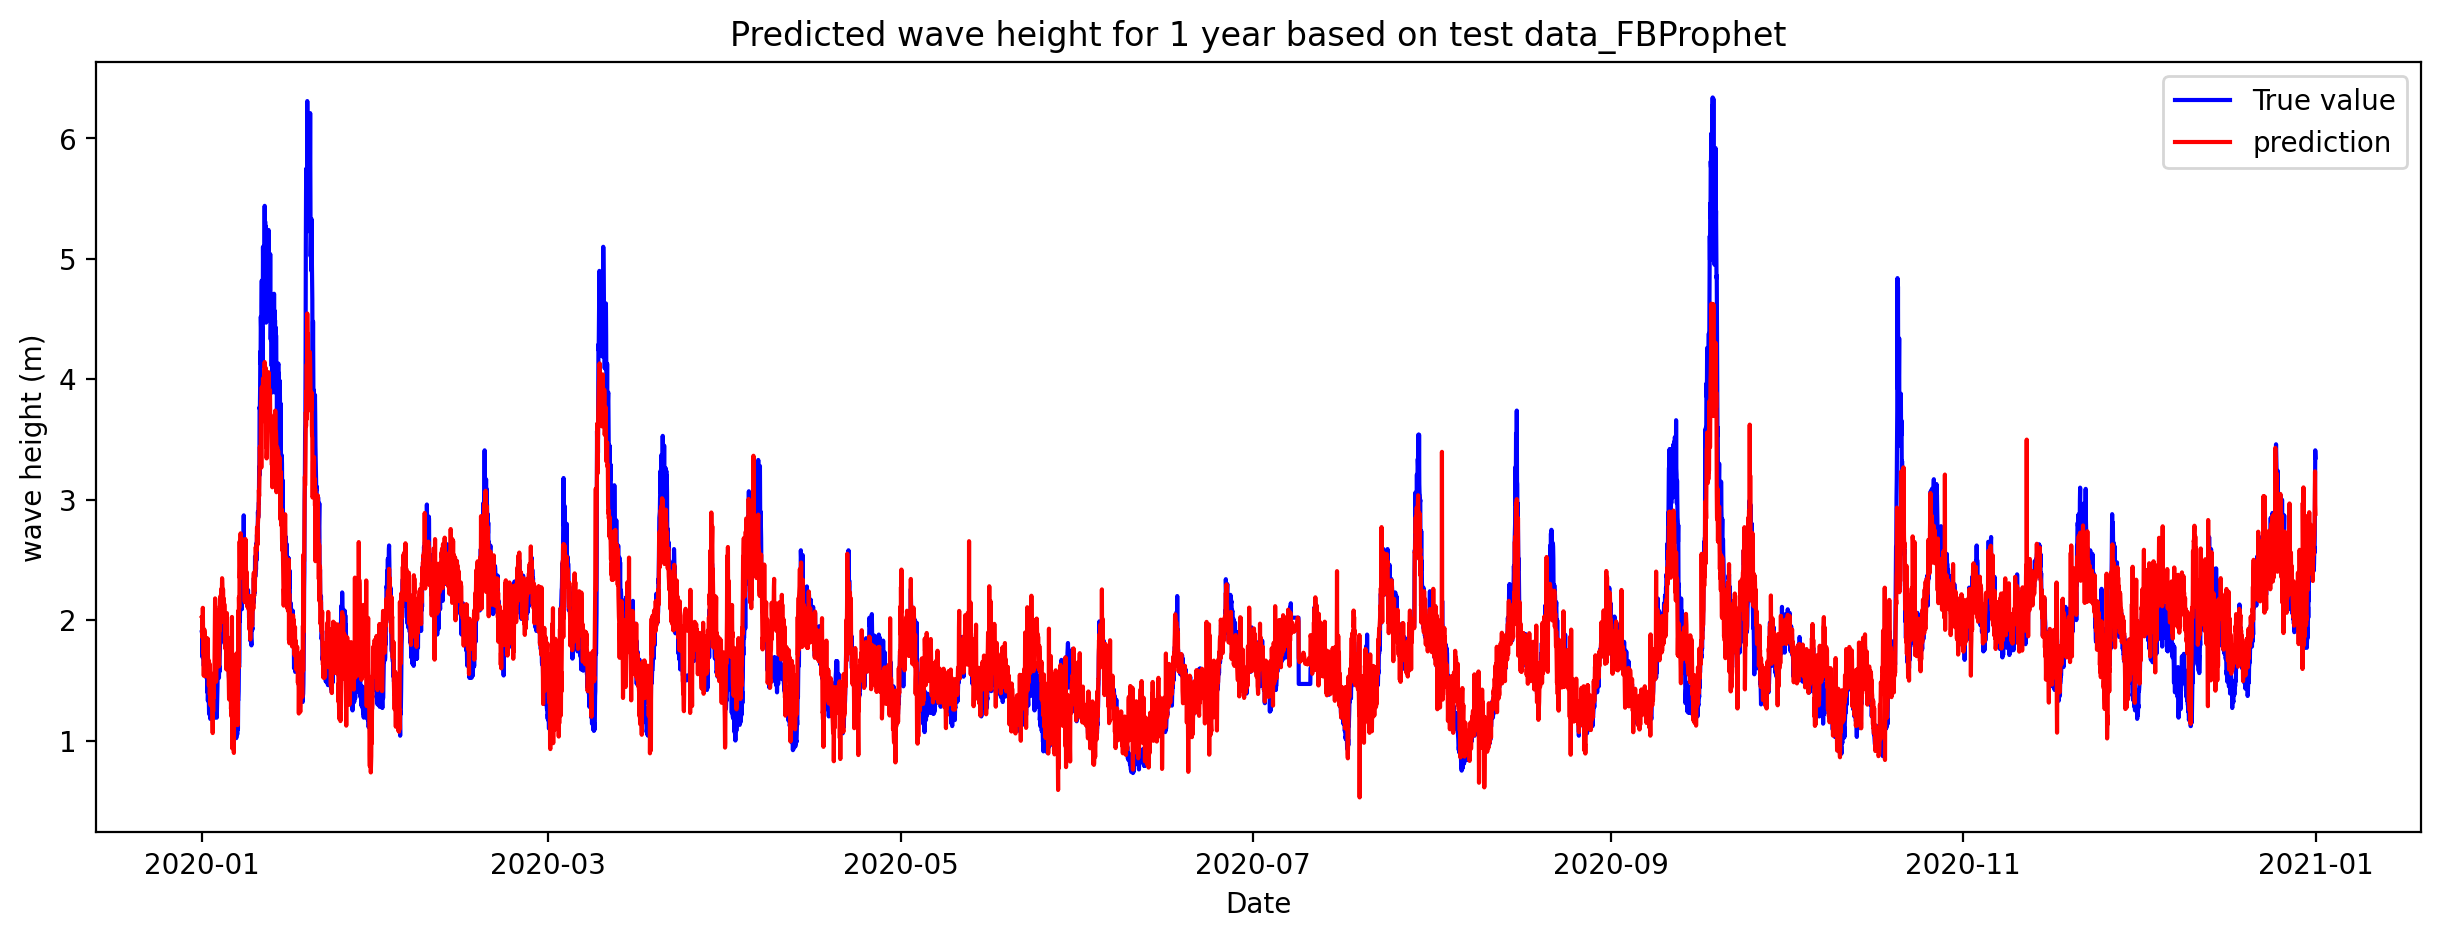

In [43]:
fig = plt.figure(figsize=(15, 5), dpi=200)
plt.plot(test2['Date'],test2['WVHT_m'], label='True value', color='blue',)
plt.plot(prediction2['ds'],prediction2['yhat'], label='prediction', color='red')


plt.xlabel('Date')
plt.ylabel('wave height (m)')
plt.title("Predicted wave height for 1 year based on test data_FBProphet")
plt.legend()
plt.show()

In [44]:
from sklearn.metrics import r2_score
r2_score(test2['WVHT_m'],prediction2['yhat'])

0.795438462742839

In [45]:
import math
from sklearn.metrics import mean_squared_error
#math.sqrt(mean_squared_error(y_pred,y_test['day5']))
math.sqrt(mean_squared_error(test2['WVHT_m'],prediction2['yhat']))

0.3058549858912191

<Figure size 3000x1000 with 0 Axes>

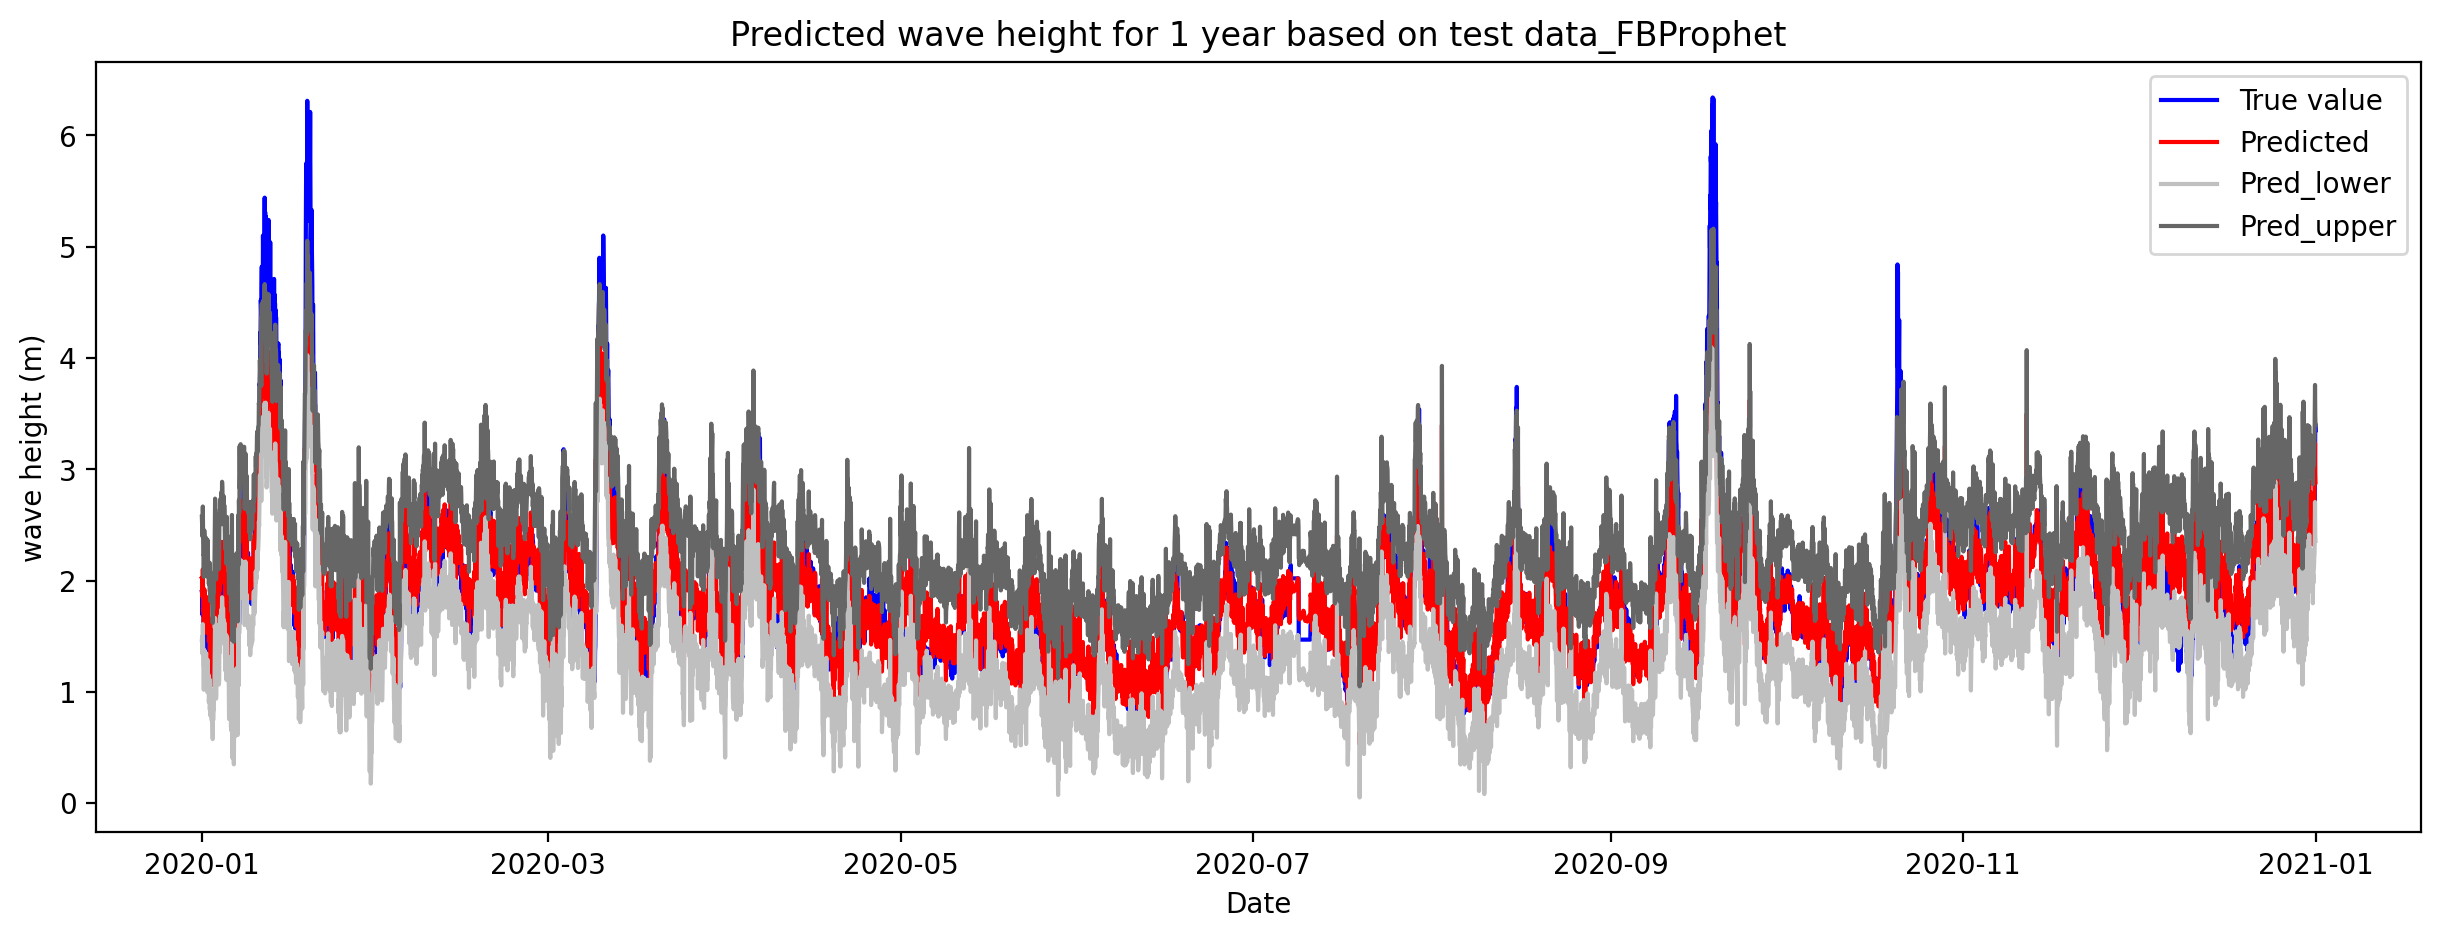

In [47]:
fig = plt.figure(figsize=(15, 5), dpi=200)
plt.plot(test2['Date'],test2['WVHT_m'], label='True value', color='blue',ls='-')
plt.plot(prediction2['ds'],prediction2['yhat'], label='Predicted', color='red',ls='-')
plt.plot(prediction2['ds'],prediction2['yhat_lower'], label='Pred_lower', color='0.75',ls='-')
plt.plot(prediction2['ds'],prediction2['yhat_upper'], label='Pred_upper', color='0.4',ls='-')



plt.xlabel('Date')
plt.ylabel('wave height (m)')
plt.title("Predicted wave height for 1 year based on test data_FBProphet")
plt.legend()
plt.show()

In [48]:
from sklearn.metrics import mean_absolute_error

In [49]:
print(mean_absolute_error(test2['WVHT_m'],prediction2['yhat']))

0.20863490505158666


In [50]:
math.sqrt(mean_absolute_error(test2['WVHT_m'],prediction2['yhat']))

0.4567657003887077

In [51]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(test2['WVHT_m'],prediction2['yhat'])

0.11645748381171775